In [2]:
# Import required libraries
from google.colab import drive
import zipfile
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the path to the ZIP file (update this path later)
zip_file_path = '/content/drive/MyDrive/Infosys.zip'  # Update this path

# Step 3: Define the extraction directory
extract_dir = '/content/extracted_files'

# Step 4: Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Step 5: Display only extracted folders
print("Extracted folders:")
for root, dirs, files in os.walk(extract_dir):
    for folder in dirs:
        print(os.path.join(root, folder))
    break  # Only show the top-level folders


Mounted at /content/drive
Extracted folders:
/content/extracted_files/myntradataset
/content/extracted_files/images


In [3]:
# Step 3: Locate the CSV file
csv_files = [f for f in os.listdir(extract_dir) if f.endswith('.csv')]

if not csv_files:
    print("No CSV files found in the extracted folder.")
else:
    csv_file_path = os.path.join(extract_dir, csv_files[0])
    print(f"CSV file found: {csv_file_path}")

CSV file found: /content/extracted_files/styles.csv


In [4]:
import pandas as pd

# Step 4: Load the CSV file into a DataFrame with problematic rows skipped
try:
    df = pd.read_csv(csv_file_path, on_bad_lines="skip")
    print("CSV file loaded successfully!")
except Exception as e:
    print(f"Error while reading the CSV: {e}")

# Display first few rows of the DataFrame
if 'df' in locals():
    print("\nFirst 10 rows of the DataFrame:")
    print(df.head())


CSV file loaded successfully!

First 10 rows of the DataFrame:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [5]:
# Step 5: Display the first 5 rows
print("\nFirst 10 rows of the DataFrame:")
print(df.head())


First 10 rows of the DataFrame:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [6]:
# Step 6: Display column names and types
print("\nColumn names and types:")
print(df.dtypes)


Column names and types:
id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object


In [7]:
# Display total null values per column
print("Null values per column:")
print(df.isnull().sum())

# Check if there are any null values in the DataFrame
if df.isnull().values.any():
    print("\nThere are null values in the DataFrame.")
    # Percentage of null values per column
    print("\nPercentage of null values per column:")
    print((df.isnull().sum() / len(df)) * 100)
else:
    print("\nNo null values in the DataFrame.")


Null values per column:
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

There are null values in the DataFrame.

Percentage of null values per column:
id                    0.000000
gender                0.000000
masterCategory        0.000000
subCategory           0.000000
articleType           0.000000
baseColour            0.033766
season                0.047272
year                  0.002251
usage                 0.713578
productDisplayName    0.015757
dtype: float64


In [8]:
# Display unique values and the most frequent value for each column
for column in df.columns:
    print(f"Column: '{column}'")

    # Unique values
    unique_values = df[column].unique()
    print(f"Unique values ({len(unique_values)}): {unique_values}")

    # Most frequent value
    most_frequent_value = df[column].value_counts().idxmax()
    frequency = df[column].value_counts().max()
    print(f"Most frequent value: '{most_frequent_value}' (Frequency: {frequency})\n")


Column: 'id'
Unique values (44424): [15970 39386 59263 ... 18842 46694 51623]
Most frequent value: '15970' (Frequency: 1)

Column: 'gender'
Unique values (5): ['Men' 'Women' 'Boys' 'Girls' 'Unisex']
Most frequent value: 'Men' (Frequency: 22147)

Column: 'masterCategory'
Unique values (7): ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
Most frequent value: 'Apparel' (Frequency: 21397)

Column: 'subCategory'
Unique values (45): ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' '

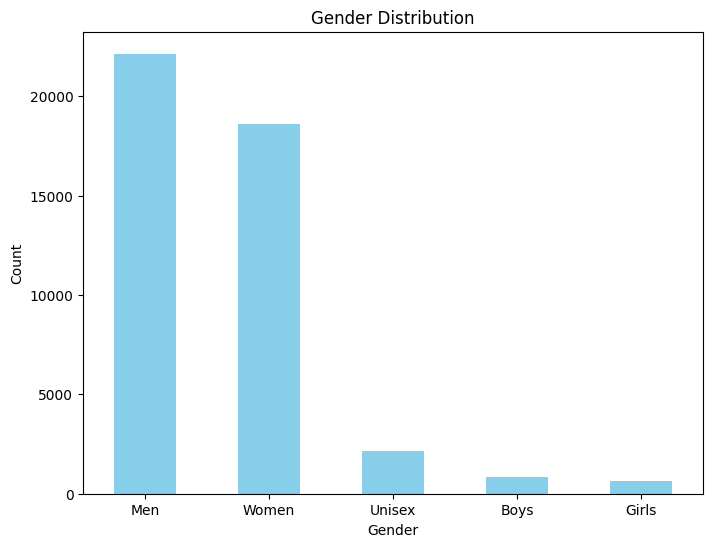

In [9]:
import matplotlib.pyplot as plt

# Bar chart for a categorical feature (e.g., 'gender')
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


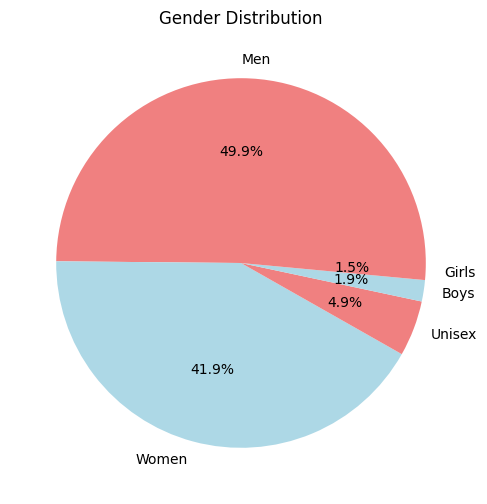

In [10]:
# Pie chart for 'gender'
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution')
plt.ylabel('')  # To remove the 'gender' label
plt.show()


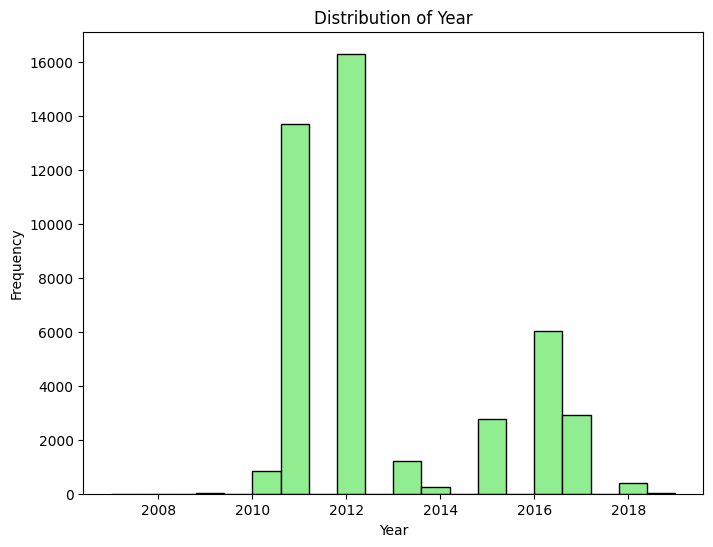

In [11]:
# Histogram for 'year'
plt.figure(figsize=(8, 6))
df['year'].dropna().plot(kind='hist', bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


<ipython-input-12-0b58313a8950>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, palette='Set2')


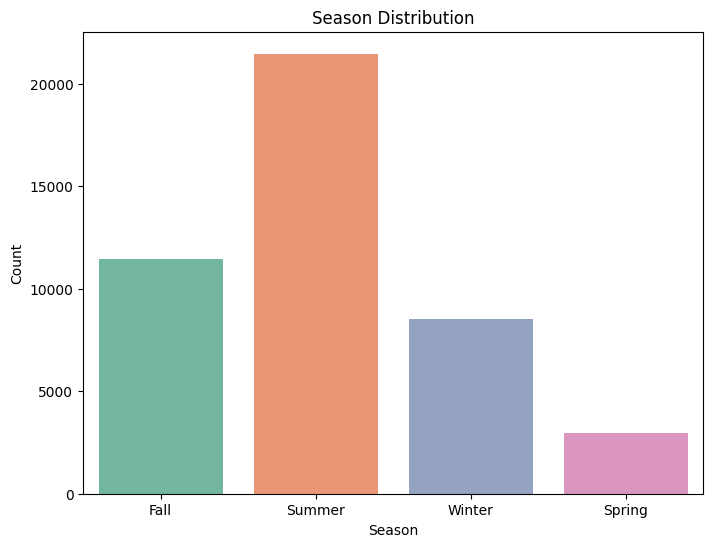

In [12]:
import seaborn as sns
# Count plot for 'season'
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=df, palette='Set2')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()


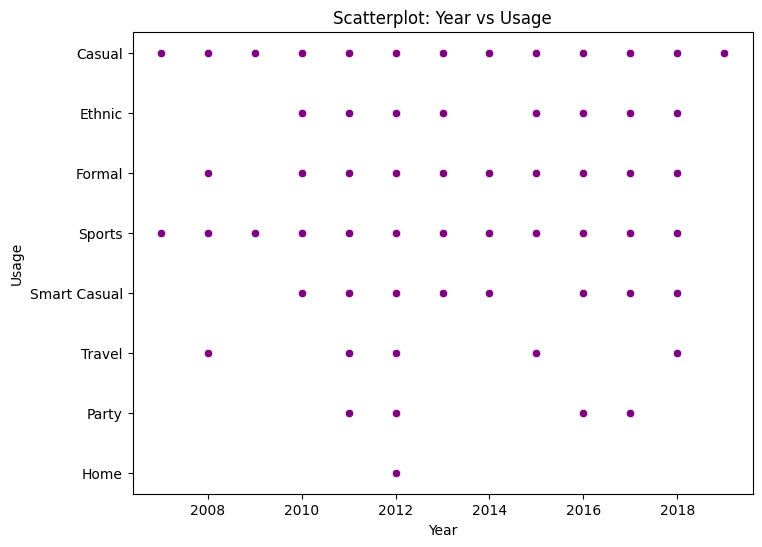

In [13]:
# Scatterplot for 'year' vs 'usage'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='usage', data=df, color='purple')
plt.title('Scatterplot: Year vs Usage')
plt.xlabel('Year')
plt.ylabel('Usage')
plt.show()


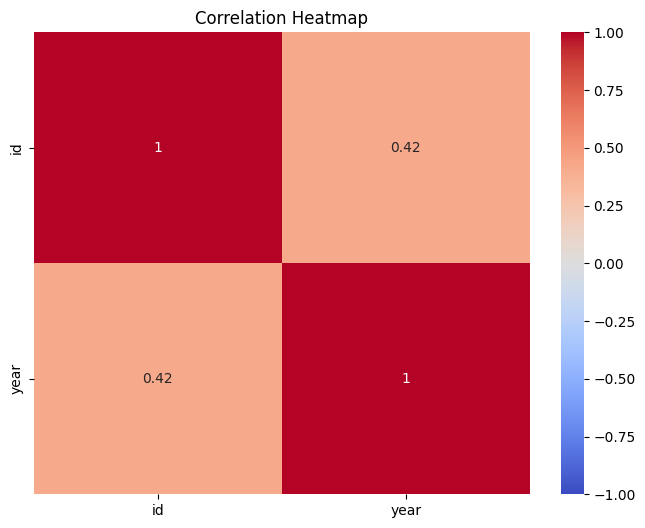

In [14]:
# Heatmap for correlation (for numerical columns)
plt.figure(figsize=(8, 6))

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # Select numerical columns

correlation_matrix = numerical_df.corr()  # Calculate correlation for numerical columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from PIL import Image
import os

# Path to image directory
image_dir = '/content/extracted_files/myntradataset/images'
image_files = [f for f in os.listdir(image_dir) if f.endswith(('jpg', 'jpeg', 'png'))]

# List to store image properties
image_properties = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    # Get image properties
    img_properties = {
        'filename': img_file,
        'format': img.format,
        'size': img.size,  # (width, height)
        'mode': img.mode,  # 'RGB', 'L', etc.
    }

    image_properties.append(img_properties)

# Display properties of the first image
print(image_properties[0])


{'filename': '36990.jpg', 'format': 'JPEG', 'size': (60, 80), 'mode': 'RGB'}


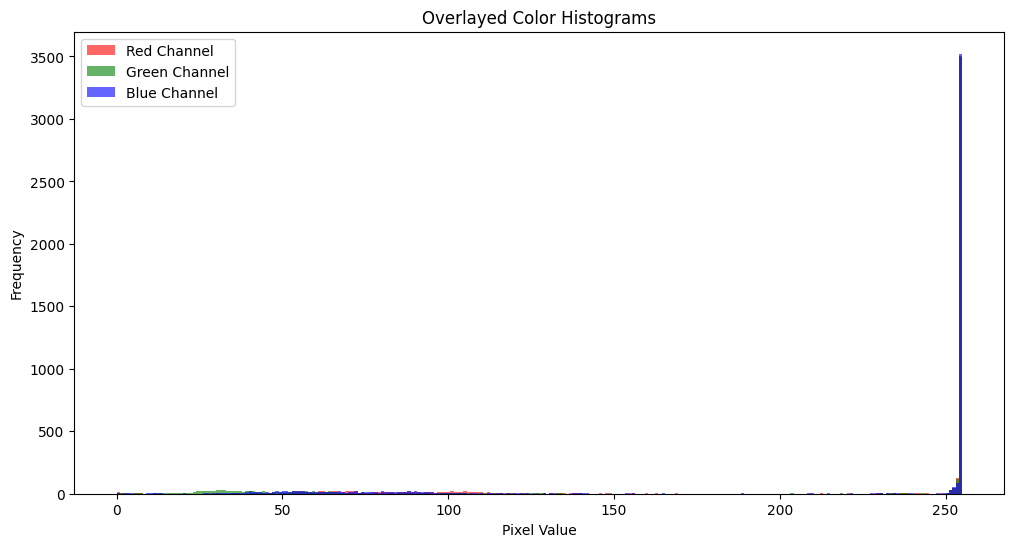

In [16]:
import numpy as np

def plot_overlay_histogram(img):
    img_rgb = img.convert('RGB')

    # Get pixel values for each channel
    r, g, b = img_rgb.split()

    # Get pixel data for each channel
    r_data = np.array(r).flatten()
    g_data = np.array(g).flatten()
    b_data = np.array(b).flatten()

    # Plot histograms overlaid for each channel
    plt.figure(figsize=(12, 6))
    plt.hist(r_data, bins=256, color='red', alpha=0.6, label='Red Channel')
    plt.hist(g_data, bins=256, color='green', alpha=0.6, label='Green Channel')
    plt.hist(b_data, bins=256, color='blue', alpha=0.6, label='Blue Channel')

    plt.title('Overlayed Color Histograms')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example: Plot overlayed histogram for the first image
img_path = os.path.join(image_dir, image_files[0])
img = Image.open(img_path)
plot_overlay_histogram(img)


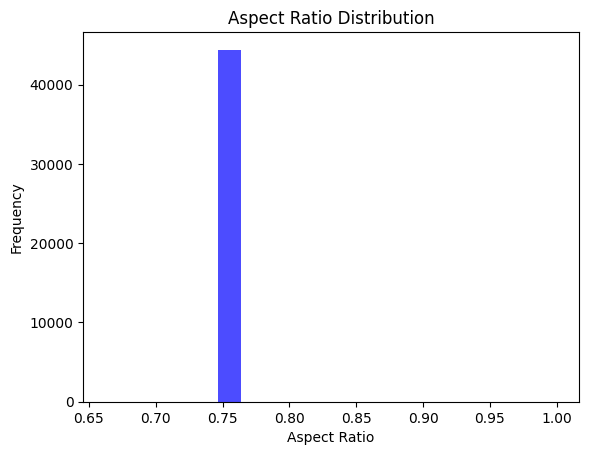

In [17]:
# List to store aspect ratios
aspect_ratios = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    width, height = img.size
    aspect_ratio = width / height  # Aspect ratio (width / height)

    aspect_ratios.append(aspect_ratio)

# Example: Plot the distribution of aspect ratios
plt.hist(aspect_ratios, bins=20, color='blue', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


In [18]:
# Define resolution thresholds
low_resolution_threshold = 500000  # e.g., 500k pixels (500x1000)

# List to store resolution categories
resolution_categories = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    width, height = img.size
    total_pixels = width * height

    if total_pixels < low_resolution_threshold:
        resolution_categories.append('Low Resolution')
    else:
        resolution_categories.append('High Resolution')

# Example: Count the number of high vs low resolution images
resolution_counts = {
    'Low Resolution': resolution_categories.count('Low Resolution'),
    'High Resolution': resolution_categories.count('High Resolution')
}

print(resolution_counts)


{'Low Resolution': 44441, 'High Resolution': 0}


In [19]:
from PIL import Image
from PIL.ExifTags import TAGS

# Extract EXIF metadata from an image
def extract_exif(img_path):
    img = Image.open(img_path)

    # Check if EXIF data is available
    exif_data = img._getexif()

    if exif_data:
        metadata = {TAGS.get(tag, tag): value for tag, value in exif_data.items()}
        return metadata
    else:
        return None

# Example: Extract and display EXIF data from the first image
img_path = os.path.join(image_dir, image_files[0])
exif_data = extract_exif(img_path)

if exif_data:
    for tag, value in exif_data.items():
        print(f"{tag}: {value}")
else:
    print("No EXIF data available for this image.")


ImageWidth: 1080
ImageLength: 1440
BitsPerSample: (8, 8, 8)
PhotometricInterpretation: 2
ResolutionUnit: 2
ExifOffset: 232
Software: Adobe Photoshop CS5.1 Windows
Orientation: 1
DateTime: 2012:04:06 11:03:28
SamplesPerPixel: 3
XResolution: 72.0
YResolution: 72.0
ExifVersion: b'0221'
ColorSpace: 65535
ExifImageWidth: 1080
ExifImageHeight: 1440


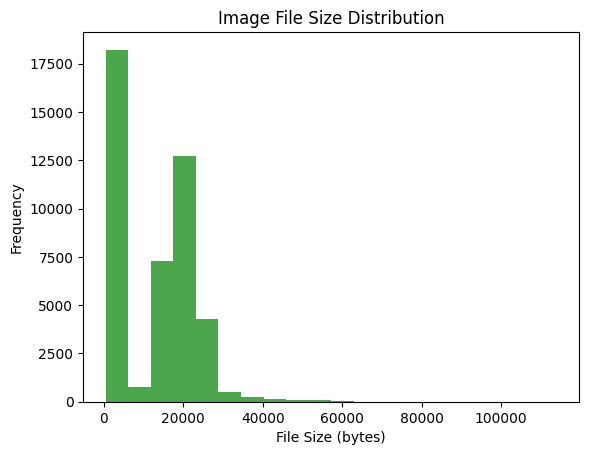

In [20]:
# List to store file sizes
file_sizes = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    file_size = os.path.getsize(img_path)  # Size in bytes
    file_sizes.append(file_size)

# Example: Plot the distribution of image file sizes
plt.hist(file_sizes, bins=20, color='green', alpha=0.7)
plt.title('Image File Size Distribution')
plt.xlabel('File Size (bytes)')
plt.ylabel('Frequency')
plt.show()


In [21]:
import numpy as np

# Initialize accumulators for channel sums
r_sum, g_sum, b_sum = 0, 0, 0
total_pixels = 0

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)
    img_rgb = img.convert('RGB')

    # Convert image to numpy array
    img_array = np.array(img_rgb)

    # Sum pixel values for each channel
    r_sum += np.sum(img_array[:, :, 0])
    g_sum += np.sum(img_array[:, :, 1])
    b_sum += np.sum(img_array[:, :, 2])

    total_pixels += img_array.size // 3  # total pixels (divide by 3 for RGB channels)

# Calculate average pixel values per channel
r_avg = r_sum / total_pixels
g_avg = g_sum / total_pixels
b_avg = b_sum / total_pixels

# Display average color balance
print(f"Average Red Channel: {r_avg:.2f}")
print(f"Average Green Channel: {g_avg:.2f}")
print(f"Average Blue Channel: {b_avg:.2f}")


Average Red Channel: 217.82
Average Green Channel: 213.37
Average Blue Channel: 211.82


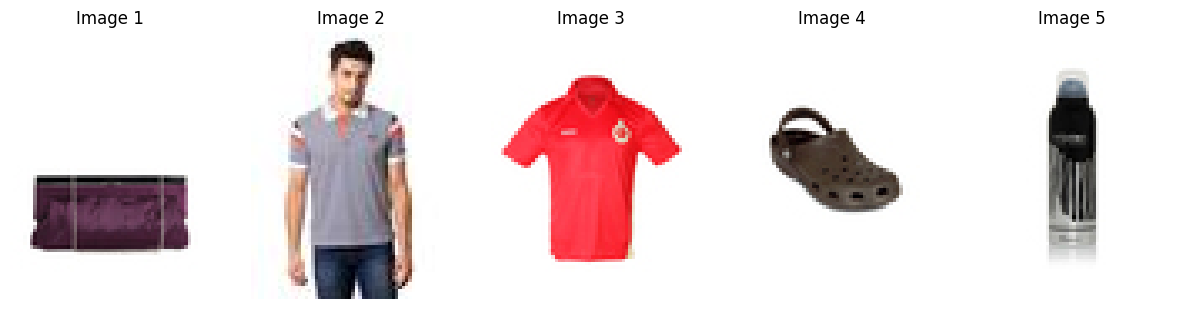

In [22]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Path to the image directory
image_dir = '/content/extracted_files/myntradataset/images'

# List all image files in the directory (you can change the file types if needed)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('jpg', 'jpeg', 'png'))]

# Display the first 5 sample images
plt.figure(figsize=(15, 10))
for i in range(5):
    img_path = os.path.join(image_dir, image_files[i])
    img = Image.open(img_path)

    # Create a subplot for each image
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.title(f"Image {i+1}")

plt.show()


In [23]:
import pandas as pd

# Load the styles.csv file and skip problematic lines
csv_file = "/content/extracted_files/myntradataset/styles.csv"
df = pd.read_csv(csv_file, on_bad_lines='skip')  # Skips lines causing issues

# Ensure the column 'id' exists in the dataset
if 'id' in df.columns:
    # Create a new column named "file name" with values like '1.jpg', '2.jpg', etc.
    df['file name'] = df['id'].astype(str) + ".jpg"

    # Save the updated dataframe back to the CSV file
    df.to_csv(csv_file, index=False)
    print("New column 'file name' added successfully!")
else:
    print("Column 'id' not found in the dataset. Please check the file.")


New column 'file name' added successfully!


In [24]:
import pandas as pd

# Load the styles.csv file
csv_file = "/content/extracted_files/myntradataset/styles.csv"

try:
    # Read the dataset
    df = pd.read_csv(csv_file, on_bad_lines='skip')  # Skips problematic rows if any

    # Print total number of columns
    print(f"Total number of columns: {len(df.columns)}\n")

    # Print column names (headings)
    print("Column Names:")
    print(df.columns.tolist(), "\n")

    # Print the first 5 rows of the dataset to preview the content
    print("Dataset Content (First 5 Rows):")
    print(df.head(), "\n")

except Exception as e:
    print(f"An error occurred: {e}")


Total number of columns: 11

Column Names:
['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'file name'] 

Dataset Content (First 5 Rows):
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  file name  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016.0  Casual                       Titan Women Silver Watch  59263.jpg  
3

In [28]:
import numpy as np
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load VGG16 pre-trained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_image_features(image_path):
    try:
        # Load image with explicit color mode
        img = image.load_img(image_path, target_size=(200, 200), color_mode='rgb')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features
        features = model.predict(img_array)
        features_flattened = features.flatten()

        return features_flattened
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to image directory
image_dir = '/content/extracted_files/myntradataset/images'
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)[:1000]]

# Robust embedding extraction
embeddings = []
for img_path in image_paths:
    feature_vector = extract_image_features(img_path)
    if feature_vector is not None:
        embeddings.append(feature_vector)

# Convert to numpy array
embeddings = np.array(embeddings)

print(f"Total embeddings extracted: {len(embeddings)}")
print(f"Embedding shape: {embeddings.shape}")
print("Sample embedding statistics:")
print(f"Mean: {np.mean(embeddings)}")
print(f"Standard deviation: {np.std(embeddings)}")
print("Embeddings:")
print(embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 


Recommended Images based on the first image (Cosine Similarity Scores):
Image 744, Similarity Score: 0.5081


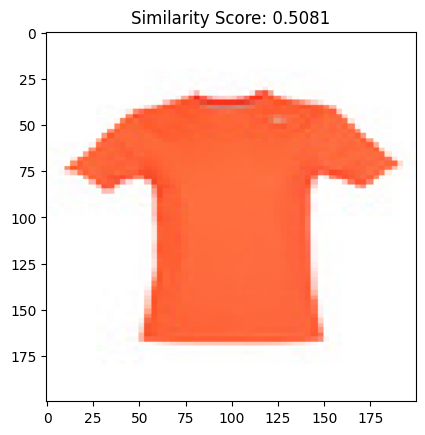

Image 44, Similarity Score: 0.5073


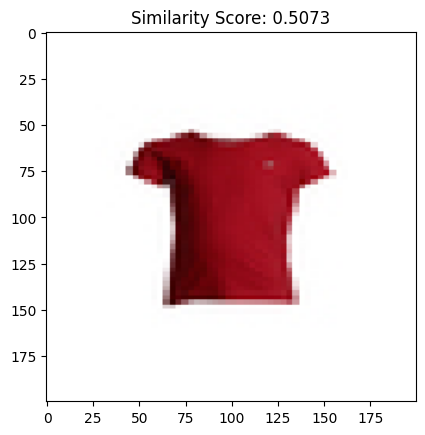

Image 644, Similarity Score: 0.5065


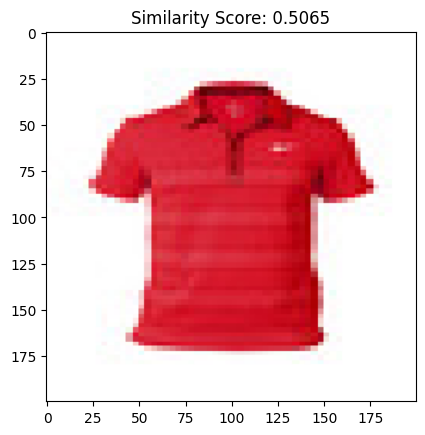

Image 594, Similarity Score: 0.4992


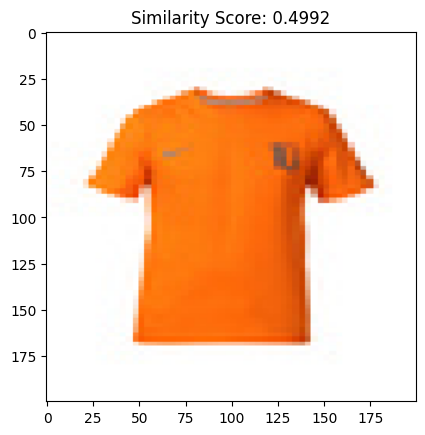

Image 799, Similarity Score: 0.4969


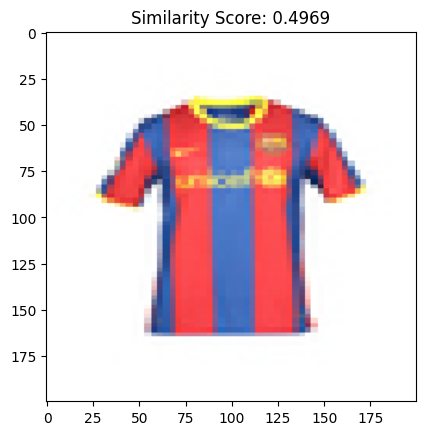

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity between the embeddings of the first image and others
def recommend_similar_images(query_index, embeddings, top_n=5):
    query_embedding = embeddings[query_index].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings)

    # Get indices of the top_n most similar images (excluding the query image itself)
    similar_indices = similarities.argsort()[0][-top_n-1:-1][::-1]

    return similar_indices, similarities[0][similar_indices]

# Get recommendations for the first image in the dataset
recommended_indices, similarity_scores = recommend_similar_images(2, embeddings, top_n=5)

# Displaying the recommendations
print("\nRecommended Images based on the first image (Cosine Similarity Scores):")
for i, score in zip(recommended_indices, similarity_scores):
    print(f"Image {i}, Similarity Score: {score:.4f}")

    # Display the recommended image
    img = image.load_img(image_paths[i], target_size=(200, 200))
    plt.imshow(img)
    plt.title(f"Similarity Score: {score:.4f}")
    plt.show()


In [38]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity

# Load DenseNet121 pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract image features using DenseNet
def extract_image_features(image_path):
    try:
        # Load image and preprocess
        img = image.load_img(image_path, target_size=(224, 224), color_mode='rgb')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features
        features = model.predict(img_array)
        features_flattened = features.flatten()

        return features_flattened
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to image directory
image_dir = '/content/extracted_files/myntradataset/images'
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)[:1000]]

# Extract embeddings for all images
embeddings = []
for img_path in image_paths:
    feature_vector = extract_image_features(img_path)
    if feature_vector is not None:
        embeddings.append(feature_vector)

# Convert embeddings to numpy array
embeddings = np.array(embeddings)

print(f"Total embeddings extracted: {len(embeddings)}")
print(f"Embedding shape: {embeddings.shape}")
print("Sample embedding statistics:")
print(f"Mean: {np.mean(embeddings)}")
print(f"Standard deviation: {np.std(embeddings)}")
print("Embeddings:")
print(embeddings)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━


Recommended Images based on the second image (Cosine Similarity Scores):
Image 362, Similarity Score: 0.7789


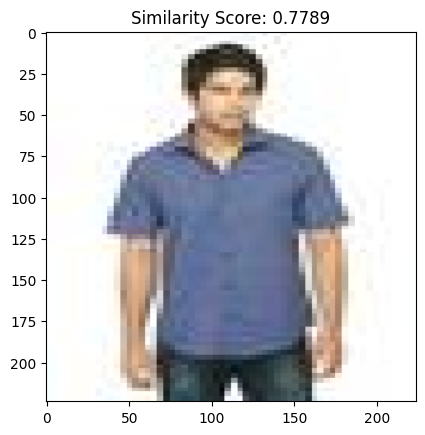

Image 6, Similarity Score: 0.7743


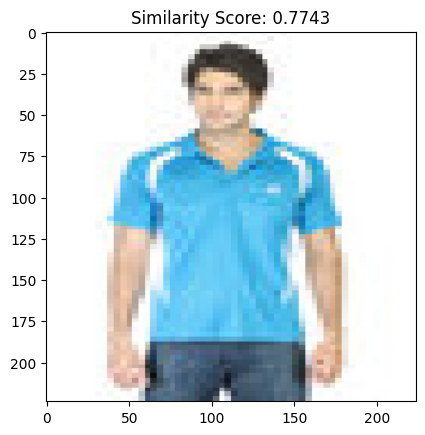

Image 586, Similarity Score: 0.7702


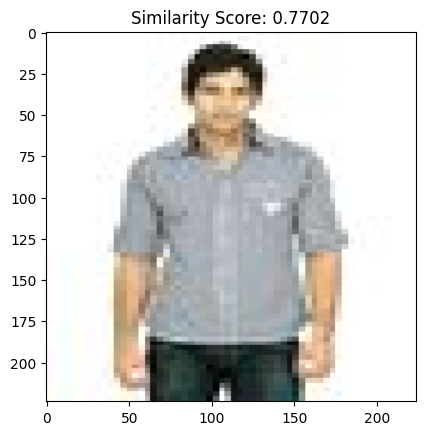

Image 99, Similarity Score: 0.7592


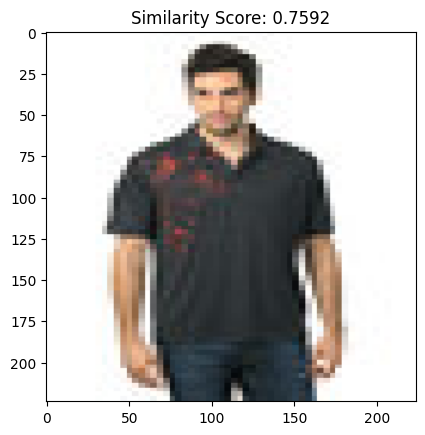

Image 284, Similarity Score: 0.7523


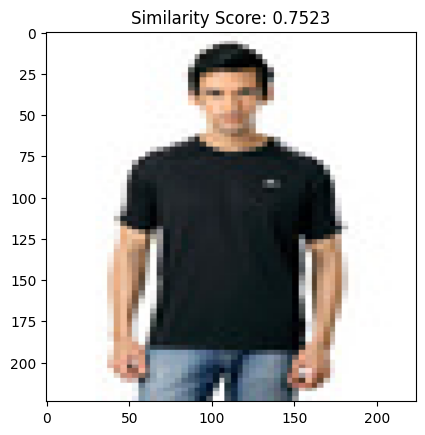

In [40]:
# Function to calculate cosine similarity and recommend similar images
def recommend_similar_images(query_index, embeddings, top_n=5):
    query_embedding = embeddings[query_index].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings)

    # Get indices of the top_n most similar images (excluding the query image itself)
    similar_indices = similarities.argsort()[0][-top_n-1:-1][::-1]

    return similar_indices, similarities[0][similar_indices]

# Get recommendations for the second image in the dataset
recommended_indices, similarity_scores = recommend_similar_images(1, embeddings, top_n=5)

# Displaying the recommendations
print("\nRecommended Images based on the second image (Cosine Similarity Scores):")
for i, score in zip(recommended_indices, similarity_scores):
    print(f"Image {i}, Similarity Score: {score:.4f}")

    # Display the recommended image
    img = image.load_img(image_paths[i], target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Similarity Score: {score:.4f}")
    plt.show()

In [42]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity

# Load MobileNet pre-trained model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract image features using MobileNet
def extract_image_features(image_path):
    try:
        # Load image and preprocess
        img = image.load_img(image_path, target_size=(224, 224), color_mode='rgb')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Extract features
        features = model.predict(img_array)
        features_flattened = features.flatten()

        return features_flattened
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Path to image directory
image_dir = '/content/extracted_files/myntradataset/images'
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir)[:1000]]

# Extract embeddings for all images
embeddings = []
for img_path in image_paths:
    feature_vector = extract_image_features(img_path)
    if feature_vector is not None:
        embeddings.append(feature_vector)

# Convert embeddings to numpy array
embeddings = np.array(embeddings)

print(f"Total embeddings extracted: {len(embeddings)}")
print(f"Embedding shape: {embeddings.shape}")
print("Sample embedding statistics:")
print(f"Mean: {np.mean(embeddings)}")
print(f"Standard deviation: {np.std(embeddings)}")
print("Embeddings:")
print(embeddings)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/ste


Recommended Images based on the second image (Cosine Similarity Scores):
Image 225, Similarity Score: 0.6766


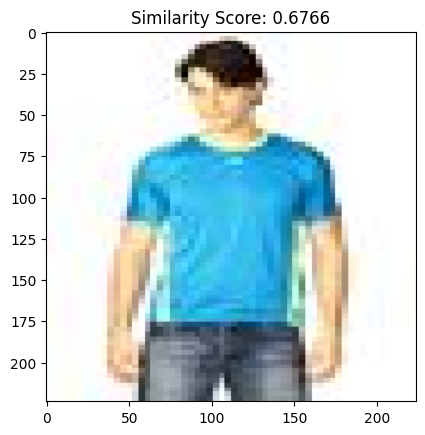

Image 362, Similarity Score: 0.6646


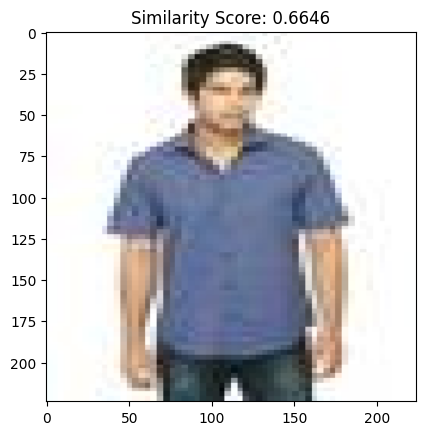

Image 586, Similarity Score: 0.6550


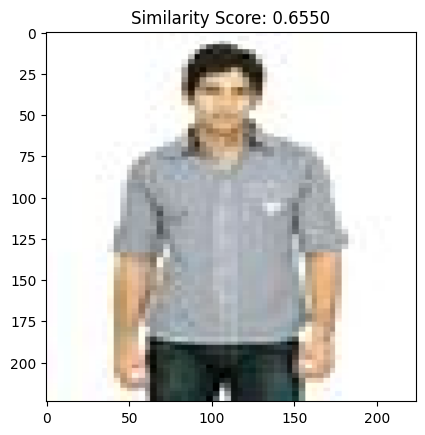

Image 194, Similarity Score: 0.6456


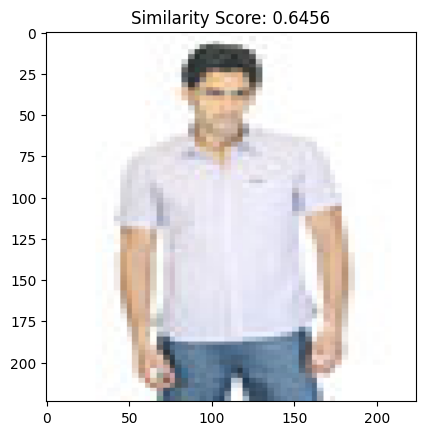

Image 381, Similarity Score: 0.6430


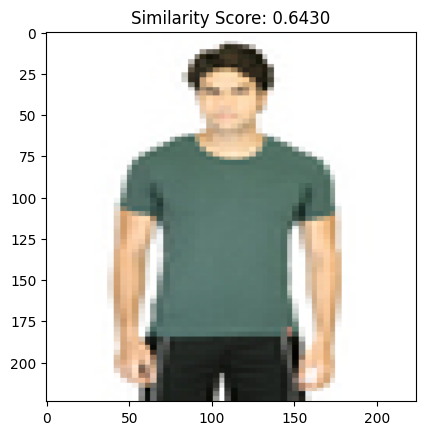

In [45]:
# Function to calculate cosine similarity and recommend similar images
def recommend_similar_images(query_index, embeddings, top_n=5):
    query_embedding = embeddings[query_index].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings)

    # Get indices of the top_n most similar images (excluding the query image itself)
    similar_indices = similarities.argsort()[0][-top_n-1:-1][::-1]

    return similar_indices, similarities[0][similar_indices]

# Get recommendations for the second image in the dataset
recommended_indices, similarity_scores = recommend_similar_images(6, embeddings, top_n=5)

# Displaying the recommendations
print("\nRecommended Images based on the second image (Cosine Similarity Scores):")
for i, score in zip(recommended_indices, similarity_scores):
    print(f"Image {i}, Similarity Score: {score:.4f}")

    # Display the recommended image
    img = image.load_img(image_paths[i], target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Similarity Score: {score:.4f}")
    plt.show()
